<a href="https://colab.research.google.com/github/Vaida-Savickiene/Data-Science-Projects/blob/main/VaidaSav_CS9_LinReg_in_R_vs_Python_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

I created linear regression models in Python for my porfolio project. For this objective, I replicated the same models in R using Google Colab solution as it can run both R and Python scripts and includes Markdown which I used for comparing model outputs between R and Python.

# How to use R in Google Colab

*rpy2* can be used to add everything R can offer to Python notebooks. This method allows to execute R and Python syntax together. (Need to use %%R as line 1 to execute cell magic)

In [45]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [46]:
# used for controling the display of output
from functools import partial
from rpy2.ipython import html
html.html_rdataframe=partial(html.html_rdataframe, table_class="docutils")

In [47]:
from rpy2.robjects.packages import importr
utils = importr('utils')

# Preparing Data in R


In [48]:
# Reading in data in R
%%R
sales <- read.csv('/content/Lin_Reg_Fencing_Sales_vs_Weather.csv')

In [49]:
# Checking the number of fields match
%%R
ncol(sales)

[1] 34


In [50]:
# First 5 rows of data
%%R 
head(sales)

  Week_Commencing Min_High_wind_gust_mph Ave_High_wind_gust_mph
1      01/01/2018                   27.1                  38.33
2      08/01/2018                   11.4                  18.10
3      15/01/2018                    9.6                  30.00
4      22/01/2018                   23.9                  31.10
5      29/01/2018                   19.0                  28.96
6      05/02/2018                   15.0                  29.14
  Max_High_wind_gust_mph Sum_High_wind_gust_mph Min_Min_temp_C Ave_Min_temp_C
1                   49.0                  268.3           -1.0           2.10
2                   33.8                  126.7            0.8           2.73
3                   62.0                  210.0           -0.8           0.96
4                   42.3                  217.7            0.0           4.90
5                   34.0                  202.7           -1.0           0.96
6                   45.6                  204.0           -2.7          -0.53
  Max_

In [51]:
%%R 
summary(sales)

 Week_Commencing    Min_High_wind_gust_mph Ave_High_wind_gust_mph
 Length:214         Min.   : 0.00          Min.   : 6.80         
 Class :character   1st Qu.: 6.30          1st Qu.:16.24         
 Mode  :character   Median :10.20          Median :19.89         
                    Mean   :11.14          Mean   :20.52         
                    3rd Qu.:14.95          3rd Qu.:24.11         
                    Max.   :37.60          Max.   :42.56         
 Max_High_wind_gust_mph Sum_High_wind_gust_mph Min_Min_temp_C  
 Min.   : 9.80          Min.   : 47.6          Min.   :-7.200  
 1st Qu.:23.75          1st Qu.:113.7          1st Qu.:-0.075  
 Median :29.30          Median :138.5          Median : 2.800  
 Mean   :30.88          Mean   :143.2          Mean   : 3.721  
 3rd Qu.:36.90          3rd Qu.:168.2          3rd Qu.: 7.750  
 Max.   :68.00          Max.   :297.9          Max.   :14.400  
 Ave_Min_temp_C   Max_Min_temp_C   Sum_Min_temp_C   Min_Max_temp_C  
 Min.   :-3.130   Min

In [52]:
# checking correlations between a few fields because the full output is not required for the purpose of this objective
%%R

my_data <- sales[, c(2,3,4,5,6,7,8,9,10,34)]

In [53]:
%%R 
res <- round(cor(my_data),2)
res

                       Min_High_wind_gust_mph Ave_High_wind_gust_mph
Min_High_wind_gust_mph                   1.00                   0.79
Ave_High_wind_gust_mph                   0.79                   1.00
Max_High_wind_gust_mph                   0.46                   0.84
Sum_High_wind_gust_mph                   0.79                   1.00
Min_Min_temp_C                          -0.05                  -0.24
Ave_Min_temp_C                          -0.08                  -0.25
Max_Min_temp_C                          -0.07                  -0.21
Sum_Min_temp_C                          -0.08                  -0.26
Min_Max_temp_C                          -0.09                  -0.29
Fencing_Sales                           -0.14                  -0.22
                       Max_High_wind_gust_mph Sum_High_wind_gust_mph
Min_High_wind_gust_mph                   0.46                   0.79
Ave_High_wind_gust_mph                   0.84                   1.00
Max_High_wind_gust_mph            

ASIDE: The outputs above is hard to read, so I found a way to tidy the display of the output ([Source](http://rpy2.github.io/doc/v3.4.x/html/generated_rst/notebooks.html))

In [54]:
# rpy2 provides customization to display R objects such as data frames in HTML in a notebook
import rpy2.ipython.html
rpy2.ipython.html.init_printing()

In [55]:
dataf = utils.read_csv('/content/Lin_Reg_Fencing_Sales_vs_Weather.csv')

In [56]:
dataf

,,Week_Commencing,Min_High_wind_gust_mph,Ave_High_wind_gust_mph,Max_High_wind_gust_mph,...,Sum_Total_sunshine_hrs,Fencing_Sales
0,1,01/01/2018,27.1,38.33,49.0,...,12.2,4457.67
1,2,08/01/2018,11.4,18.1,33.8,...,0.5,7254.43
2,3,15/01/2018,9.6,30.0,62.0,...,25.7,11405.81
3,4,22/01/2018,23.9,31.1,42.3,...,14.6,9439.66
4,5,29/01/2018,19.0,28.96,34.0,...,17.8,16618.45
5,6,05/02/2018,15.0,29.14,45.6,...,22.2,12222.69
6,7,12/02/2018,13.0,24.97,33.8,...,22.5,9608.98
7,8,19/02/2018,14.8,24.07,37.4,...,25.7,12226.61
...,...,...,...,...,...,...,...,...
212,213,18/04/2022,14.3,20.79,26.8,...,33.2,32944.74


# Creating Graphs in R

I wanted to create graphs using R, but it is not a simple task. This is what I found: 

"*ggplot2* is one of most popular R visulization packages, and Python users have started various projects to try port it to Python. For now, the best way to have *ggplot2* might be to use *ggplot2* from Python."

In [57]:
%%R
install.packages('lazyeval')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/lazyeval_0.2.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 83482 bytes (81 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write

In [58]:
import rpy2.robjects.lib.ggplot2 as gp

In [59]:
from rpy2.robjects import rl
from rpy2.robjects.conversion import localconverter as lc

In [60]:
# Calling ggplot2 in Python is almost same as in R

#step 1: create a R/ggplot2 object
p = (gp.ggplot(dataf) +
     gp.aes(x=rl('Sum_Total_sunshine_hrs'),
            y=rl('Fencing_Sales')) +
     gp.geom_point())

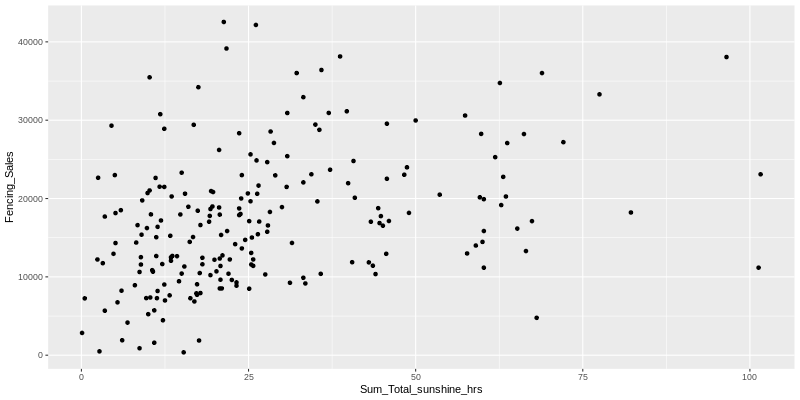

In [61]:
# step2: plott the R/ggplot2 object
from rpy2.ipython.ggplot import image_png
image_png(p)

In [62]:
# A boxlot in R
boxp = (gp.ggplot(dataf) +
     gp.aes(x=rl('Sum_Total_sunshine_hrs'),
            y=rl('Fencing_Sales')) +
     gp.geom_boxplot())

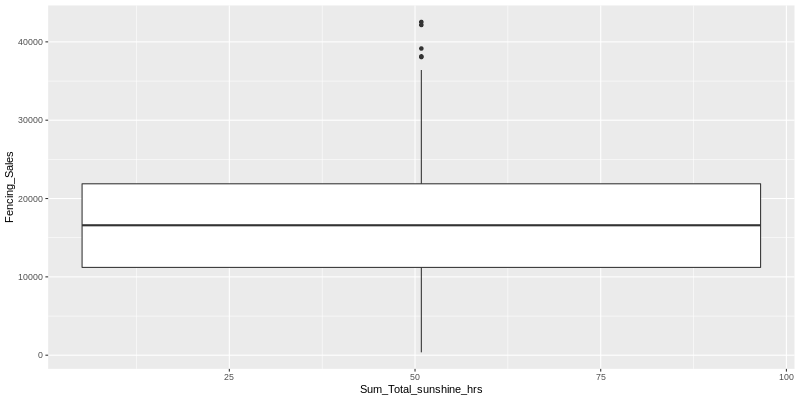

In [63]:
image_png(boxp)

# Creating Graphs in Python

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

%matplotlib inline

In [65]:
# Read in Data in Python
sales_py = pd.read_csv('/content/Lin_Reg_Fencing_Sales_vs_Weather.csv')

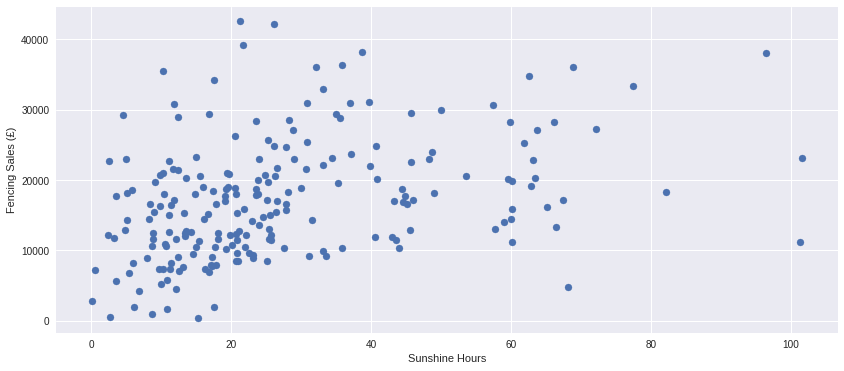

In [66]:
fig, ax = plt.subplots(figsize=(14, 6))
ax.scatter(x = sales_py['Sum_Total_sunshine_hrs'], y = sales_py['Fencing_Sales'])
plt.xlabel("Sunshine Hours")
plt.ylabel("Fencing Sales (£)")
plt.show()

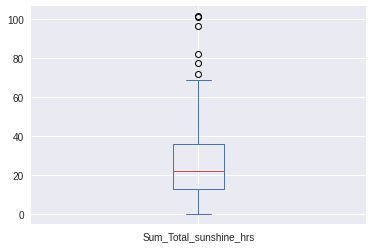

In [67]:
sales_py_box = sales_py[['Sum_Total_sunshine_hrs']]

sales_py_box.plot(kind = 'box');

# Simple Linear Regression in R

Here the main objective is to replicate the linear regression models from Python for comparison, therefore I chose the same variables as before. 

In [70]:
# check correlation is 
%%R 
cor(sales$Fencing_Sales, sales$Max_Total_sunshine_hrs)

[1] 0.401462


In [71]:
# create a linear model
%%R
myRmodel <- lm(Fencing_Sales ~ Max_Total_sunshine_hrs, data = sales)

In [72]:
# Describe the model
%%R 
summary(myRmodel)


Call:
lm(formula = Fencing_Sales ~ Max_Total_sunshine_hrs, data = sales)

Residuals:
   Min     1Q Median     3Q    Max 
-15961  -5570  -1357   4259  29214 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)              9914.2     1265.5   7.834 2.24e-13 ***
Max_Total_sunshine_hrs    832.2      130.4   6.382 1.08e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7812 on 212 degrees of freedom
Multiple R-squared:  0.1612,	Adjusted R-squared:  0.1572 
F-statistic: 40.73 on 1 and 212 DF,  p-value: 1.081e-09



In [74]:
# plotting the line of best fit
r_linreg_plot = (gp.ggplot(dataf) + 
                 gp.aes(x = rl('Max_Total_sunshine_hrs'), y = rl('Fencing_Sales') ) + 
                 gp.geom_point() + 
                 gp.geom_smooth(method = 'lm')) # it is a good idea to plot this 

R[write to console]: `geom_smooth()` using formula 'y ~ x'



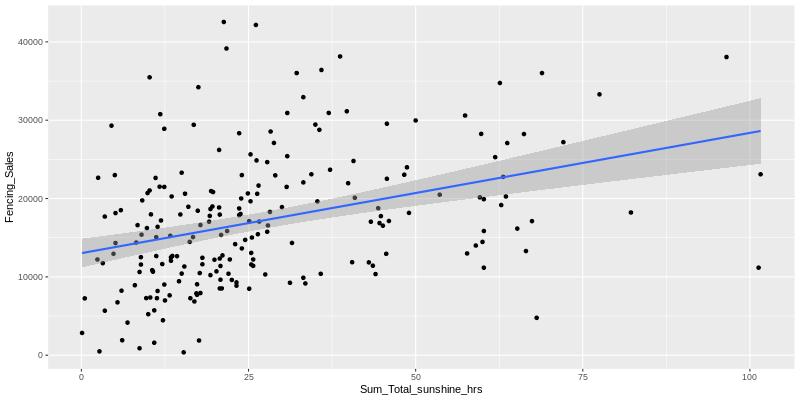

In [ ]:
image_png(r_linreg_plot)

In [75]:
# function to make a specific prediction y = mx + c
%%R
y_pred <- function(x){
  return( x * 832.2  + 9914.2)
}

In [77]:
#predict values
%%R
y_pred(2)

[1] 11578.6


The simple linear regression model

# Multiple Linear Regression in R

In [78]:
# checking correlations between other features
%%R 
cor(sales$Fencing_Sales, sales$Min_Max_temp_C)

[1] 0.3553098


In [79]:
%%R 
cor(sales$Fencing_Sales, sales$Ave_High_avg_wind_speed_mph)

[1] -0.3265406


In [80]:
# Multiple regression
%%R
multimodel <- lm(Fencing_Sales ~ Max_Total_sunshine_hrs + Min_Max_temp_C + Ave_High_avg_wind_speed_mph, data = sales)

In [81]:
%%R
summary(multimodel)


Call:
lm(formula = Fencing_Sales ~ Max_Total_sunshine_hrs + Min_Max_temp_C + 
    Ave_High_avg_wind_speed_mph, data = sales)

Residuals:
   Min     1Q Median     3Q    Max 
-16635  -4997  -1386   3898  29307 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  14357.6     2235.5   6.423 8.81e-10 ***
Max_Total_sunshine_hrs         620.1      151.5   4.093 6.08e-05 ***
Min_Max_temp_C                 137.3      117.3   1.171    0.243    
Ave_High_avg_wind_speed_mph   -438.1      140.0  -3.129    0.002 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7555 on 210 degrees of freedom
Multiple R-squared:  0.2229,	Adjusted R-squared:  0.2118 
F-statistic: 20.08 on 3 and 210 DF,  p-value: 1.766e-11



# LinReg Model Output Comparisons R vs Python

## Simple LinReg

Simple LinReg equation in R: Fencing_Sales = £9,914 + £832 * Max_Total_sunshine_hrs with R2 = 16%

Simple LinReg equation in Python: Fencing_Sales = £10,368 + £782 * Max_Total_sunshine_hrs with R2 = 13% 

The coefficients are slightly different because I used train/test split in Python and not in R, but overall the models are very similar.



## Multi LinReg

Multiple LinReg equation in R:
Fencing_Sales = £14,358 + £620 * Max_Total_sunshine_hrs - £438 * Ave_High_avg_wind_speed_mph with adjusted R2 = 21%

Multiple LinReg equation in Python:
Fencing_Sales = £14,360 + £620 * Max_Total_sunshine_hrs - £438 * Ave_High_avg_wind_speed_mph + error with R2 = 21%

Models are practically identical.